D22017-Gowtham kumar


D22043-Sachin

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from matplotlib.pyplot import imread

In [2]:
import cv2

In [5]:
data = pd.read_csv("cars.csv")
data

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150,3436,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150,3433,12.0,70,US
4,Ford Torino,17.0,8,302.0,140,3449,10.5,70,US
...,...,...,...,...,...,...,...,...,...
401,Ford Mustang GL,27.0,4,140.0,86,2790,15.6,82,US
402,Volkswagen Pickup,44.0,4,97.0,52,2130,24.6,82,Europe
403,Dodge Rampage,32.0,4,135.0,84,2295,11.6,82,US
404,Ford Ranger,28.0,4,120.0,79,2625,18.6,82,US


In [6]:
x=data.drop(['Car','MPG','Origin'],axis=1)
y=data.MPG

In [7]:
x

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model
0,8,307.0,130,3504,12.0,70
1,8,350.0,165,3693,11.5,70
2,8,318.0,150,3436,11.0,70
3,8,304.0,150,3433,12.0,70
4,8,302.0,140,3449,10.5,70
...,...,...,...,...,...,...
401,4,140.0,86,2790,15.6,82
402,4,97.0,52,2130,24.6,82
403,4,135.0,84,2295,11.6,82
404,4,120.0,79,2625,18.6,82


In [8]:
scaled_data = preprocessing.scale(x)
scaled_data

array([[ 1.47634917,  1.07087561,  0.65406396,  0.62010716, -1.25708027,
        -1.58146259],
       [ 1.47634917,  1.48120772,  1.5188866 ,  0.84352182, -1.43565781,
        -1.58146259],
       [ 1.47634917,  1.17584429,  1.14824832,  0.53972516, -1.61423534,
        -1.58146259],
       ...,
       [-0.86276405, -0.57045283, -0.48256008, -0.80903746, -1.3999423 ,
         1.62356475],
       [-0.86276405, -0.71359194, -0.60610617, -0.41894836,  1.10014317,
         1.62356475],
       [-0.86276405, -0.72313454, -0.53197851, -0.30664998,  1.38586722,
         1.62356475]])

In [9]:
scaled_data.shape

(406, 6)

In [10]:
pca = PCA(n_components = 6)
# this is where we do PCA math (ie calculate loading scores and the variance each principal component accounts for)
pca.fit(scaled_data)


PCA(n_components=6)

In [11]:
pca.components_

array([[ 0.45531261,  0.46871364,  0.45680955,  0.44505984, -0.33065034,
        -0.23856883],
       [ 0.18498605,  0.1646537 ,  0.01114387,  0.26372851,  0.20188087,
         0.91007501],
       [ 0.17056729,  0.13777596, -0.13028547,  0.2792247 ,  0.86464317,
        -0.33072047],
       [ 0.56175694,  0.21119842, -0.74436753, -0.20575134, -0.20480874,
        -0.03822454],
       [-0.45066059,  0.01076262, -0.46721395,  0.71966322, -0.23865743,
        -0.06023125],
       [-0.4590333 ,  0.83035767, -0.04306559, -0.30684494,  0.05833234,
         0.01958166]])

In [12]:
pca_data = pca.transform(scaled_data) # generating coordinates for a pca graph
pca_data

array([[ 2.54184354e+00, -1.07277368e+00, -7.66118246e-02,
         7.58976472e-01, -1.17861442e-01, -1.11224156e-01],
       [ 3.28771065e+00, -9.72704078e-01, -2.24774699e-01,
         1.92498445e-01, -3.14100222e-01,  1.13283653e-01],
       [ 2.89911057e+00, -1.14328487e+00, -4.57791035e-01,
         5.02978079e-01, -3.20231790e-01, -4.15138338e-02],
       ...,
       [-1.16515504e+00,  7.22673832e-01, -2.13618334e+00,
         1.45180576e-01,  2.62215789e-01,  1.41518526e-01],
       [-1.94172444e+00,  1.30532572e+00,  1.30796137e-01,
        -3.85387192e-01,  2.46650077e-03,  5.41214250e-02],
       [-1.95683023e+00,  1.39187906e+00,  3.98229472e-01,
        -5.24205120e-01, -1.96428334e-02,  2.52140605e-02]])

In [13]:
pca_data.shape

(406, 6)

In [14]:
# percentage of variation that each principal component accounts for 

percentage_variance = np.round(pca.explained_variance_ratio_*100, decimals = 1)
percentage_variance

array([70.8, 13.8, 10.9,  2.6,  1.3,  0.6])

In [15]:
cum_var_exp = np.cumsum(percentage_variance)
cum_var_exp

array([ 70.8,  84.6,  95.5,  98.1,  99.4, 100. ])

# Experiment 2

In [16]:
x_std=preprocessing.StandardScaler().fit_transform(x)


In [17]:
x_covariance_matrix=np.cov(x_std.T)


In [18]:
eig_vals,eig_vecs=np.linalg.eig(x_covariance_matrix)

In [19]:
eig_vals,eig_vecs

(array([4.25996353, 0.83010635, 0.65801684, 0.15420171, 0.03583018,
        0.0766962 ]),
 array([[ 0.45531261,  0.18498605, -0.17056729, -0.56175694, -0.4590333 ,
          0.45066059],
        [ 0.46871364,  0.1646537 , -0.13777596, -0.21119842,  0.83035767,
         -0.01076262],
        [ 0.45680955,  0.01114387,  0.13028547,  0.74436753, -0.04306559,
          0.46721395],
        [ 0.44505984,  0.26372851, -0.2792247 ,  0.20575134, -0.30684494,
         -0.71966322],
        [-0.33065034,  0.20188087, -0.86464317,  0.20480874,  0.05833234,
          0.23865743],
        [-0.23856883,  0.91007501,  0.33072047,  0.03822454,  0.01958166,
          0.06023125]]))

In [20]:
eig_vecs.shape

(6, 6)

In [21]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
4.259963526939359
0.8301063450221565
0.6580168449721217
0.15420171475210712
0.07669620120102652
0.0358301819280494


In [22]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print ("Variance captured by each component is \n",var_exp)
print(40 * '-')
print ("Cumulative variance captured as we travel each component \n",cum_var_exp)

Variance captured by each component is 
 [70.82451676561736, 13.801029135220572, 10.939935230447826, 2.563698459548577, 1.2751215716919424, 0.5956988374737272]
----------------------------------------
Cumulative variance captured as we travel each component 
 [ 70.82451677  84.6255459   95.56548113  98.12917959  99.40430116
 100.        ]


In [23]:
print("All Eigen Values along with Eigen Vectors")
print(eig_pairs)
print(40 * '-')
matrix_w = np.hstack((eig_pairs[0][1].reshape(6,1),
                      eig_pairs[1][1].reshape(6,1)))

print('Matrix W:\n', matrix_w)

All Eigen Values along with Eigen Vectors
[(4.259963526939359, array([ 0.45531261,  0.46871364,  0.45680955,  0.44505984, -0.33065034,
       -0.23856883])), (0.8301063450221565, array([0.18498605, 0.1646537 , 0.01114387, 0.26372851, 0.20188087,
       0.91007501])), (0.6580168449721217, array([-0.17056729, -0.13777596,  0.13028547, -0.2792247 , -0.86464317,
        0.33072047])), (0.15420171475210712, array([-0.56175694, -0.21119842,  0.74436753,  0.20575134,  0.20480874,
        0.03822454])), (0.07669620120102652, array([ 0.45066059, -0.01076262,  0.46721395, -0.71966322,  0.23865743,
        0.06023125])), (0.0358301819280494, array([-0.4590333 ,  0.83035767, -0.04306559, -0.30684494,  0.05833234,
        0.01958166]))]
----------------------------------------
Matrix W:
 [[ 0.45531261  0.18498605]
 [ 0.46871364  0.1646537 ]
 [ 0.45680955  0.01114387]
 [ 0.44505984  0.26372851]
 [-0.33065034  0.20188087]
 [-0.23856883  0.91007501]]


In [24]:
Y = x_std.dot(eig_vecs)
Y

array([[ 2.54184354e+00, -1.07277368e+00,  7.66118246e-02,
        -7.58976472e-01, -1.11224156e-01,  1.17861442e-01],
       [ 3.28771065e+00, -9.72704078e-01,  2.24774699e-01,
        -1.92498445e-01,  1.13283653e-01,  3.14100222e-01],
       [ 2.89911057e+00, -1.14328487e+00,  4.57791035e-01,
        -5.02978079e-01, -4.15138338e-02,  3.20231790e-01],
       ...,
       [-1.16515504e+00,  7.22673832e-01,  2.13618334e+00,
        -1.45180576e-01,  1.41518526e-01, -2.62215789e-01],
       [-1.94172444e+00,  1.30532572e+00, -1.30796137e-01,
         3.85387192e-01,  5.41214250e-02, -2.46650077e-03],
       [-1.95683023e+00,  1.39187906e+00, -3.98229472e-01,
         5.24205120e-01,  2.52140605e-02,  1.96428334e-02]])

# Result 2

Pc1

In [27]:
np.var(Y[:,0])

4.249471005937043

In [28]:
eig_vals[0]

4.259963526939359

Pc2

In [29]:
np.var(Y[:,1])

0.8280617481132333

In [30]:
eig_vals[1]

0.8301063450221565

Pc3

In [31]:
np.var(Y[:,2])

0.6563961138268701

In [32]:
eig_vals[2]

0.6580168449721217

Pc4

In [33]:
np.var(Y[:,3])

0.15382190757291447

In [34]:
eig_vals[3]

0.15420171475210712

Pc5

In [35]:
np.var(Y[:,4])

0.0357419302484235

In [36]:
eig_vals[4]

0.0358301819280494

Pc6

In [37]:
np.var(Y[:,5])

0.07650729430151654

In [38]:
eig_vals[5]

0.07669620120102652

# Result 3

In [39]:
x_covariance_matrix.shape

(6, 6)

In [40]:
x_covariance_matrix

array([[ 1.00246914,  0.95413713,  0.82550026,  0.8974309 , -0.52374152,
        -0.3616525 ],
       [ 0.95413713,  1.00246914,  0.87591573,  0.93477706, -0.55936137,
        -0.38265671],
       [ 0.82550026,  0.87591573,  1.00246914,  0.8428867 , -0.68373085,
        -0.42096602],
       [ 0.8974309 ,  0.93477706,  0.8428867 ,  1.00246914, -0.43114775,
        -0.31616758],
       [-0.52374152, -0.55936137, -0.68373085, -0.43114775,  1.00246914,
         0.30273812],
       [-0.3616525 , -0.38265671, -0.42096602, -0.31616758,  0.30273812,
         1.00246914]])

In [41]:
x_covariance_matrix[0,1]

0.9541371300810713

In [42]:
covlis=[]
for i in range(len(x_covariance_matrix)):
    covlis.append(x_covariance_matrix[i,i])
sum(covlis)    

6.014814814814817

In [43]:
sum(eig_vals)

6.0148148148148195

# Experiment 4

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [135]:
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,test_size=0.2)

In [136]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [137]:
y_pred_train=lr.predict(x_train)

In [138]:
y_pred=lr.predict(x_valid)

In [139]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [140]:
r2_score(y_train,y_pred_train)

0.780117490937985

In [141]:
mean_absolute_error(y_train,y_pred_train)

2.9309411951933324

# With PCA

In [142]:
x=pca_data
y=data.MPG


In [143]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [144]:
X_train,X_valid , y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=30)


In [145]:
lr_pca=LinearRegression()
lr_pca.fit(X_train,y_train)

LinearRegression()

In [146]:
y_pred=lr_pca.predict(X_valid)

In [147]:
y_pred_train=lr_pca.predict(X_train)

In [148]:
r2_score(y_train,y_pred_train)

0.765993602198217

In [149]:
mean_absolute_error(y_train,y_pred_train)

2.799782498193876

# With PCA 95% variance

In [150]:
x=data.drop(['Car','MPG','Origin'],axis=1)
y=data.MPG

In [151]:
pca = PCA(0.95)
X_pca = pca.fit_transform(x)
X_pca.shape

(406, 1)

In [152]:
pca.explained_variance_ratio_


array([0.99737829])

In [153]:
pca.n_components_


1

In [154]:
x=X_pca
y=data.MPG


In [155]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [156]:
X_train,X_valid , y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=30)


In [157]:
lr_pca=LinearRegression()
lr_pca.fit(X_train,y_train)

LinearRegression()

In [158]:
y_pred=lr_pca.predict(X_valid)

In [159]:
y_pred_train=lr_pca.predict(X_train)

In [160]:
r2_score(y_train,y_pred_train)

0.640550530348776

In [161]:
mean_absolute_error(y_train,y_pred_train)

3.4426219655100176

# Experiment 5

(400, 400, 3)


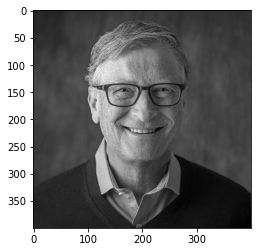

In [47]:
img = cv2.imread("Bill gates.jpg")
img = img.astype(np.uint8)
print(img.shape)
img = img.mean(axis=2)
plt.imshow(img, cmap="gray")



In [48]:
def transform(percentage):
    tswizzle_pca = PCA(n_components=percentage).fit(img)
    transformed = tswizzle_pca.transform(img)
    projected = tswizzle_pca.inverse_transform(transformed)
    plt.imshow(projected, cmap="gray")

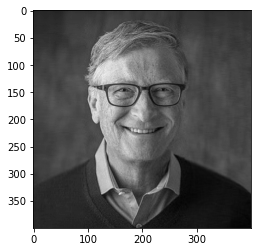

In [49]:
transform(95)

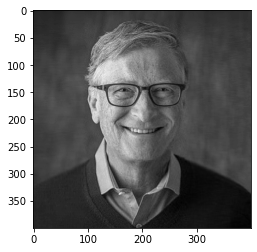

In [50]:
transform(90)

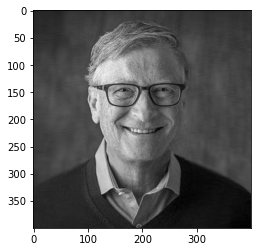

In [51]:
transform(80)

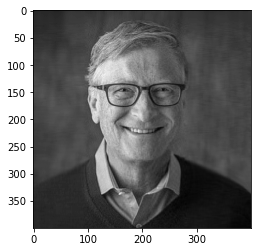

In [52]:
transform(70)

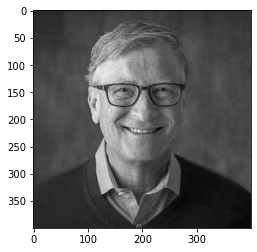

In [53]:
transform(60)

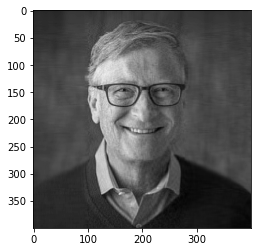

In [54]:
transform(50)

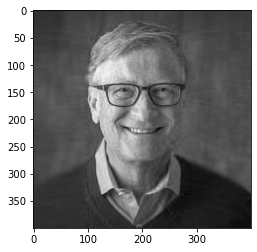

In [55]:
transform(40)

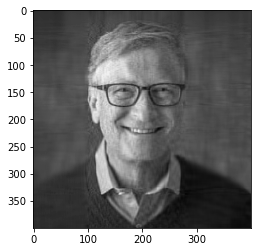

In [56]:
transform(30)

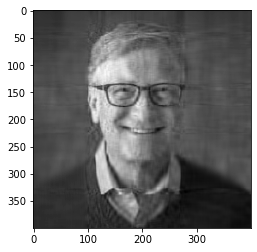

In [57]:
transform(20)

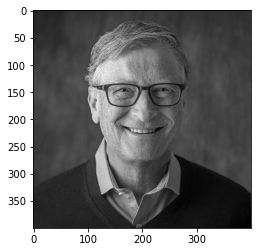

In [58]:
transform(400)

# Inverse transformed matrix represenattion

In [60]:
img = cv2.imread("Bill gates.jpg")


In [61]:
blue,green,red =cv2.split(img)

In [62]:
green_transformed = pca.fit_transform(green)
green_inverted = pca.inverse_transform(green_transformed)

In [67]:

pca = PCA(400)

#Applying to red channel and then applying inverse transform to transformed array.
red_transformed = pca.fit_transform(red)
red_inverted = pca.inverse_transform(red_transformed)

#Applying to Green channel and then applying inverse transform to transformed array.
green_transformed = pca.fit_transform(green)
green_inverted = pca.inverse_transform(green_transformed)

#Applying to Blue channel and then applying inverse transform to transformed array.
blue_transformed = pca.fit_transform(blue)
blue_inverted = pca.inverse_transform(blue_transformed)
comp_img(400)    

In [68]:
img_compressed = (np.dstack((red_inverted, green_inverted, blue_inverted))).astype(np.uint8)


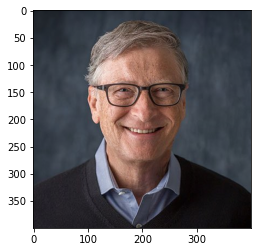

In [69]:
plt.imshow(img_compressed)
